In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
def getGender(str):
    if str=='male':
        return 1
    else:
        return 2

data['Gender'] = data['Sex'].apply(getGender)

In [ ]:
data = data.drop(columns=['Sex'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gender
0,0,3,22.0,1,0,7.2500,NaN,S,1
1,1,1,38.0,1,0,71.2833,C85,C,2
2,1,3,26.0,0,0,7.9250,NaN,S,2
3,1,1,35.0,1,0,53.1000,C123,S,2
4,0,3,35.0,0,0,8.0500,NaN,S,1


In [ ]:
data.isnull().sum()
# data.notnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Gender        0
dtype: int64

In [ ]:
(687/891)*100 # 77% of cabin values are null
# This is a lot so drop this column

77.10437710437711

In [ ]:
data = data.drop(columns=['Cabin'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,2
2,1,3,26.0,0,0,7.9250,S,2
3,1,1,35.0,1,0,53.1000,S,2
4,0,3,35.0,0,0,8.0500,S,1


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Gender        0
dtype: int64

In [ ]:
(177/891)*100 
# replace null with mean

19.865319865319865

In [ ]:
mean_survived = data[data.Survived==1].Age.mean()
mean_not_survived = data[data.Survived==0].Age.mean()

data.Age = np.where(data.Age.isnull(), mean_survived, data.Age)
# data.Age.loc[data.isnull(), 'Age'] = data.Age.mean()
# data.Age.fillna(mean_survived, inplace=True)

In [ ]:
data.Embarked.value_counts()
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,2
2,1,3,26.0,0,0,7.9250,S,2
3,1,1,35.0,1,0,53.1000,S,2
4,0,3,35.0,0,0,8.0500,S,1


In [ ]:
data.Embarked.fillna('S', inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Gender      0
dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
df = ct.fit_transform(data.values)
df

array([[0.0, 0.0, 1.0, ..., 0, 7.25, 1],
       [1.0, 0.0, 0.0, ..., 0, 71.2833, 2],
       [0.0, 0.0, 1.0, ..., 0, 7.925, 2],
       ...,
       [0.0, 0.0, 1.0, ..., 2, 23.45, 2],
       [1.0, 0.0, 0.0, ..., 0, 30.0, 1],
       [0.0, 1.0, 0.0, ..., 0, 7.75, 1]], dtype=object)

In [ ]:
df[0]

array([0.0, 0.0, 1.0, 0, 3, 22.0, 1, 0, 7.25, 1], dtype=object)

In [ ]:
data.iloc[0,:]

Survived       0
Pclass         3
Age         22.0
SibSp          1
Parch          0
Fare        7.25
Embarked       S
Gender         1
Name: 0, dtype: object

In [ ]:
def getEmbark(chr):
    if chr=='S':
        return 1;
    elif chr=='Q':
        return 2
    else:
        return 3
    
data.Embarked = data.Embarked.apply(getEmbark)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,3,2
2,1,3,26.0,0,0,7.9250,1,2
3,1,1,35.0,1,0,53.1000,1,2
4,0,3,35.0,0,0,8.0500,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Gender    891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
import seaborn as sns

<AxesSubplot:>

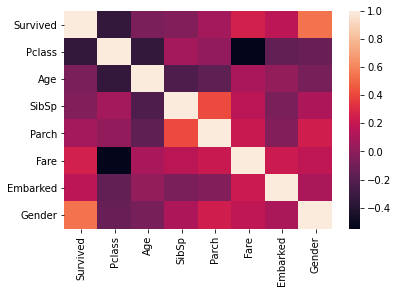

In [ ]:
sns.heatmap(data.corr())